In [1]:
# Pulizia
from IPython import get_ipython
get_ipython().run_line_magic('clear', '')
get_ipython().run_line_magic('reset', '-f')

# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import h5py
import sys
import os
import json
import time

from solver_class import FiniteElementCylinderSolver, ReducedBasisCylinderSolver

## **Check dimensions**

In [1]:
# Apri il file in modalità lettura
with h5py.File('checkpoint/step_190/matrici_RB.h5', 'r') as hf:
    # Accedi ai dataset e ricrea le matrici
    MM_RB = hf['MM_RB'][:]   #N_epsilon x N_epsilon
    FF_RB = hf['FF_RB'][:]   #N_epsilon x 1
    KK_RB = hf['KK_RB'][:]   #N_D+N_D x N_epsilon x N_epsilon
    AA_RB = hf['AA_RB'][:]   #N_epsilon
    ZZ_CO = hf['ZZ_CO'][:]   #N_D
    II_CO = hf['II_CO'][:]   #N_D x N_D
    basis = hf['basis'][:]   #mask_in_C x N_epsilon

print(MM_RB.shape[0])
print(FF_RB.shape)
print(KK_RB.shape)
print(AA_RB.shape)
print(ZZ_CO.shape)
print(II_CO.shape)
print(basis.shape)

190
(190, 1)
(16, 190, 190)
(190,)
(8,)
(8, 8)
(9900, 190)


## **Errore massimo in norma L2**

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190]


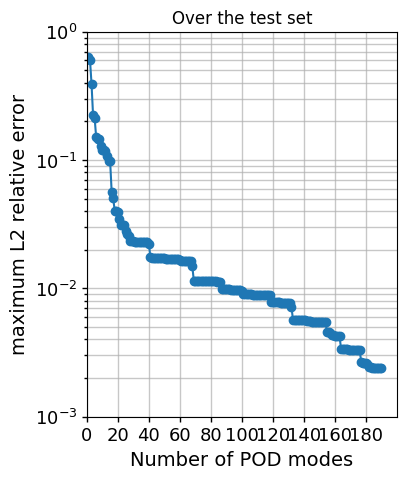

In [3]:
max_errors_L2 = np.load('L2 errors/max_errors_L2.npy').tolist()
dimensions = list(range(1, len(max_errors_L2) + 1))
print(dimensions)

fig, (ax1) = plt.subplots(1, figsize=(4,5))
ax1.set_yscale('log')
ax1.plot(dimensions,max_errors_L2,  '-o')
ax1.tick_params(axis="y", which='both',labelsize=13,  width=1)
ax1.tick_params(axis='x', labelsize=13,  width=1)
ax1.set_xlabel('Number of POD modes',fontsize=14)
ax1.set_ylabel('maximum L2 relative error',fontsize=14)
#ax1.axvspan(1, NN, color='gray', alpha=0.2)
xticks = np.arange(0,200, 20)  
ax1.set_xticks(xticks)
ax1.set_xlim([0, 200])
ax1.set_ylim([1e-3, 1])
ax1.set_title(rf'Over the test set')
ax1.grid(visible=True, which='both', linewidth=1, alpha=0.7)
plt.savefig(os.path.join('plot/L2error.pdf'), bbox_inches='tight')


## **Computational savings**

## **Plot savings vs L2 error**

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190]


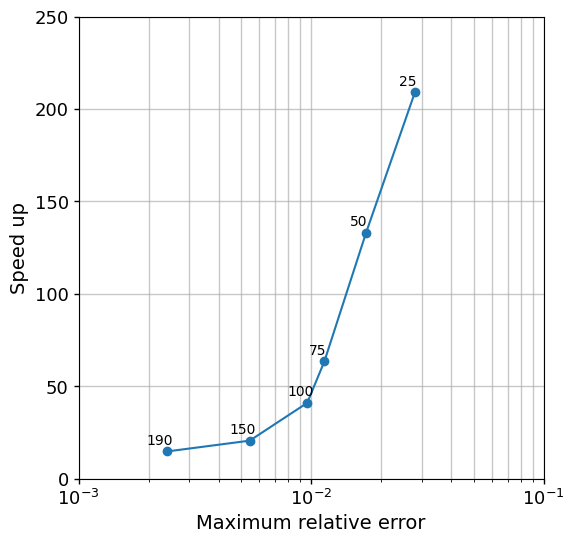

In [12]:
import matplotlib.ticker as ticker

max_errors_L2 = np.load('L2 errors/max_errors_L2.npy').tolist()
computational_savings = np.load('L2 errors/computational_savings.npy').tolist()
dimensions = list(range(1, len(computational_savings) + 1))
print(dimensions)
max_errors_L2 = np.array(max_errors_L2)
computational_savings = np.array(computational_savings)

index = [24, 49, 74, 99, 149, 189]
#computational_savings[0] = 305
fig, (ax1) = plt.subplots(1, figsize=(6,6))
ax1.set_xscale('log') 
ax1.plot(max_errors_L2[index],computational_savings[index], '-o')
ax1.tick_params(axis="y", which='both',labelsize=13,  width=1)
ax1.tick_params(axis='x', labelsize=13,  width=1)
#ax1.set_xlabel(r'max $\eta (t, \tilde{\boldsymbol{\mu}})$',fontsize=14)
ax1.set_xlabel(r'Maximum relative error',fontsize=14)
ax1.set_ylabel('Speed up',fontsize=14)
#ax1.axvspan(1, NN, color='gray', alpha=0.2)
#xticks = np.arange(0,200, 20)  
#ax1.set_xticks(xticks)
ax1.set_ylim([0, 250])
ax1.set_xlim([1e-3, 1e-1])
ax1.grid(visible=True, which='both', linewidth=1, alpha=0.7)

# Aggiungi gli indici accanto ai punti
for i, idx in enumerate(index):
    ax1.annotate(f'{idx+1}', (max_errors_L2[idx], computational_savings[idx]),
                textcoords="offset points", xytext=(-5, 5), ha='center', fontsize=10)

# ax2 = ax1.twiny()
# ax2.set_xlim(ax1.get_xlim())
# ax2.xaxis.set_major_locator(ticker.FixedLocator(max_errors_L2[index]))  # Posizione dei tick
# ax2.xaxis.set_major_formatter(ticker.FixedFormatter(index))  # Etichette dei tick (dimensioni)
# # Aggiustiamo i tick e le etichette
# ax2.tick_params(direction='in', labelsize=13)  # Etichette in stile interno
# ax2.set_xlabel('Number of POD modes', fontsize=14)  # Etichetta per l'asse superiore

plt.savefig(os.path.join('plot/computational savings.pdf'), bbox_inches='tight')

## **Modificare la dimensione dello spazio ridotto**

In [ ]:
# #Se si vuole salvare il file con meno basi
# dim=148
# MM_RB = MM_RB[:dim, :dim]
# FF_RB = FF_RB[:dim]
# KK_RB = KK_RB[:, :dim, :dim]
# AA_RB = AA_RB[:dim]
# basis = basis [:, :dim]


# print(MM_RB.shape)
# print(FF_RB.shape)
# print(KK_RB.shape)
# print(AA_RB.shape)
# print(basis.shape)

# # with h5py.File('checkpoint/matrici_RB.h5', 'w') as hf:
# #     hf.create_dataset('MM_RB', data=MM_RB)
# #     hf.create_dataset('FF_RB', data=FF_RB)
# #     hf.create_dataset('KK_RB', data=KK_RB)
# #     hf.create_dataset('AA_RB', data=AA_RB)
# #     hf.create_dataset('ZZ_CO', data=ZZ_CO)
# #     hf.create_dataset('II_CO', data=II_CO)
# #     hf.create_dataset('basis', data=basis)

## **Importo il training set o il test set**

In [5]:
import numpy as np 
loaded_data = np.load('checkpoint/training_set.npz')
LIST_FR = loaded_data['FR']
LIST_BC = loaded_data['BC']
LIST_LL = loaded_data['LL']
LIST_RR = loaded_data['RR']
LIST_FY = loaded_data['FY']
LIST_K = loaded_data['K']

print(LIST_RR)

[1.99245302e-05 8.54366476e-06 1.65153682e-05 ... 1.55354324e-05
 1.56137481e-05 1.96780533e-05]
